<a href="https://colab.research.google.com/github/pablopsz/data_science/blob/main/Avalia%C3%A7%C3%A3o_de_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Avaliação de Risco de Crédito


Uma das áreas mais movimentadas no mundo hoje é o mundo dos *bancos*. Afinal, em uma era que você não precisa sair do seu quarto para criar uma conta em um banco digital, quem não tem uma conta?

Mas com uma quantidade tão elevada de usuários, como manter um controle de qualidade de cada um? Para isso temos o Machine Learning em nossas vidas!

Com nosso aprendizado de máquina, conseguimos estimar se uma pessoa irá deixar de cumprir com suas obrigações financeira, ajudando no controle de *inadimplência* ou "default".

Avaliar se uma pessoa irá deixar de cumprir com suas obrigações financeiras é de *extrema importância*, e pode causar um grande impacto no balanço da Instituição.

*Default* é o termo utilizado para indicado o não cumprimento das obrigações e/ou condições de um empréstimo (como financiamentos ou dívidas de cartão de crédito). Normalmente, o principal motivo para o descumprimento das condições de pagamento é incapacidade financeira do cliente.

Segundo um [estudo da Agência Brasil](https://agenciabrasil.ebc.com.br/economia/noticia/2023-12/endividamento-atinge-766-das-familias-brasileiras-mostra-cnc#:~:text=correntes”%2C%20comentou.-,Inadimplência,%2C%20de%2030%2C3), o índice de famílias inadimplentes em novembro de 2023 ficou em 29%.

<p align=center>
  <img src="https://images.unsplash.com/photo-1556742502-ec7c0e9f34b1?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=687&q=80" width="40%">
</p>

Grandes bancos e Fintechs têm apostado cada vez mais em modelos de *Machine Learning* para previnir a inadimplência de alguns clientes.

Dentre as principais instituições financeira, o [Nubank](https://nubank.com.br/sobre-nos) é uma das que mais tem se destacado no uso de Inteligência Artificial e times de *Data Science*.

O conjunto de dados a ser utilizado neste Projeto de *Data Science* parte de uma competição realizada pela Startup [Nubank](https://nubank.com.br/sobre-nos) a fim de revelar talentos e potenciais contratações pela Fintech.

## Contextualização do Problema

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Startup Nubank não coumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.

Importante dizer também que, para que seja efetiva, essa avaliação deve ocorrer no momento que o cliente solicita o cartão (geralmente no primeiro contato com a instituição).

> OBJETIVO: Criar um modelo que forneça a probabilidade de um cliente virar inadimplente.

Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.

### Hipóteses Iniciais

* Qual a proporção de clientes normais para clientes inadimplentes?

* Quais informações são importante para uma análise de inadimplência?

## Importando os Dados

Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). Consiste basicamente em um arquivo `csv` contendo 45.000 entradas e 43 colunas.

Este arquivo será importando para uma estrutura *DataFrame* utilizando a biblioteca `pandas` a fim de possibilitar sua manipulação e análise.

In [44]:
# importar as bibliotecas que utilizaremos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

Vamos começar importando nossos dados e enxergando as 5 primeiras linhas desses.

In [45]:
# ler nosso arquivo
df = pd.read_csv('http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0')

#ver as 5 primeiras entradas do nosso dataset
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


## Análise Exploratória

Vamos ver algumas características dos nosso dados, como as dimensões, porcentagem de valores ausentes por variável e quantidade de valores únicos por variável.

In [46]:
# ver as dimensoes do dataset
print(f'Dimensoes dos nossos dados:{df.shape}\n')

# ver a quantidade de valores ausentes por variavel
print(f'Porcentagem de valores ausentes por variável:\n{df.isnull().sum().sort_values(ascending=False)/df.shape[0]}\n')

# ver a tipagem das colunas
print(f'Tipagem das colunas:\n{df.dtypes.sort_values(ascending=True)}\n')

# ver a quantidade de valores unicos por variavel
print(f'Quantidade de valores únicos:\n{df.nunique().sort_values(ascending=True)}\n')

Dimensoes dos nossos dados:(45000, 43)

Porcentagem de valores ausentes por variável:
target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044

Desde já, podemos enxergar algumas peculiaridades em nossos dados:

* Se trata de um grande número de colunas, provavelmente teremos que trabalhar com seleção de variáveis (antes mesmo das transformações que realizaremos mais tarde no projeto).
* Um número significativo de variáveis possuem dados ausentes, essas deverão ser trabalhadas.
* Cerca de 7.2% dos dados da noss variável alvo estão ausentes.
* Temos variáveis com valores únicos por linha, assim como temos variáveis com um único valor em todas as linhas.
* Algumas variáveis possuem a exata mesma quantidade de valores nulos.

Vamos começar nossa limpeza. Para facilitar a tomada de decisão em cada caso, farei uma função para que possamos ver que tipo de informação está presente em cada variável.

In [ ]:
# criar a funcao
def unique_val (df):

  '''A lógica dessa função é verificar se a variável possui valores ausentes
  e depois mostrar dados da variável como o nome, quantidade de valores únicos,
  se de fato ela possui valores ausentes e os valores únicos da variável'''

  for col in df.columns:

    val_null = ['Sim' if df[col].isnull().sum() > 0 else 'Nao']


    print(f'\nNome da variavel: {col}')
    print(f'Quantidade de valores: {df[col].nunique()}')
    print(f'Tipo da coluna: {df[col].dtype}')
    print(f'Valores ausentes: {(val_null)}')
    print(df[col].unique())

# chamar a funcao em nosso dataset
unique_val(df)

## Preparação dos Dados

Após analisar cada variável, vamos começar a engenharia em nossos dados. Primeiro, vamos retirar as colunas que não utilizaremos em nossos dados por diversos motivos.

In [48]:
# criar cópia dos dados originais
df_clean = df.copy()

# dropar variáveis com valor único
df_clean.drop(['external_data_provider_credit_checks_last_2_year', 'channel'],axis=1, inplace=True)

# dropar as variáveis ids e phone_number
df_clean.drop(['ids'],axis=1, inplace=True)

# dropar variáveis categóricas com o valor muito alto de valores
df_clean.drop(['application_time_applied', 'external_data_provider_first_name', 'job_name', 'shipping_zip_code', 'reason', 'zip', 'user_agent'],
              axis=1, inplace=True)

#d ropar variável que não utilizaremos ou que carecem de informação para ajustes
df_clean.drop(['target_fraud', 'external_data_provider_credit_checks_last_year','lat_lon', 'profile_phone_number'],
              inplace=True, axis=1)

# dropar linhas que possuem diversas features sem informação
df_clean.dropna(subset=['risk_rate', 'income', 'state', 'real_state', 'score_1', 'n_accounts', 'score_2', 'score_3'],
                inplace=True)

df_clean.dropna(subset=['target_default'], axis=0, inplace=True)

Retirando as variáveis necessárias, vamos ajustar os valores ausentes.

In [49]:
# preencher os valores ausentes com 0
df_clean.last_amount_borrowed.fillna(0, inplace=True)
df_clean.last_borrowed_in_months.fillna(0, inplace=True)
df_clean.credit_limit.fillna(0, inplace=True)
df_clean.n_bankruptcies.fillna(0, inplace=True)
df_clean.n_defaulted_loans.fillna(0, inplace=True)

# preencher os valores ausentes com a moda
df_clean.ok_since.fillna(df_clean.ok_since.mode()[0], inplace=True)
df_clean.n_issues.fillna(df_clean.n_issues.mode()[0], inplace=True)
df_clean.external_data_provider_email_seen_before.fillna(df['external_data_provider_email_seen_before'].mode()[0], inplace=True)

# preencher os valores ausentes com False
df_clean.facebook_profile.fillna(False, inplace=True)

# preencher os valores ausentes com o valor mais utilizado na variavel
df_clean.marketing_channel.fillna('Website', inplace=True)

Para evitar problemas desde já, a variável 'reported_income' possui valores [infinitos](https://numpy.org/devdocs/reference/constants.html). Vamos retirar esses valores do nosso dataset e trocar os valores nulos pela moda da variável.

In [50]:
# retirar valores infitos dos dados
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)

# substituir valores nulos pela moda da variavel
df_clean.reported_income.fillna(df_clean.reported_income.mode()[0], inplace=True)

Podemos observar também que a variável 'external_data_provider_email_seen_before' possui valores negativos e a variável 'email' possui valores escritos errados. Vamos ajustar isso.

In [51]:
# substituir valores negativos na variavel 'external_data_provider_email_seen_before'
df_clean.external_data_provider_email_seen_before.replace(-999, 0, inplace=True)
df_clean.external_data_provider_email_seen_before.replace(-1, 0, inplace=True)

# substituir valores negativos na variavel 'email'
df_clean.email.replace('gmaill', 'gmail', inplace=True)
df_clean.email.replace('hotmaill', 'hotmaill', inplace=True)

Após todas as transformações, vamos conferir se nossos dados não possuem de fato nenhum valor nulo.

In [52]:
# ver porcentagem de valores ausente por variavel
print(f'Porcentagem de valores ausentes por variavel:\n{df_clean.isnull().sum().sort_values(ascending=False)/df.shape[0]}\n')

Porcentagem de valores ausentes por variavel:
target_default                                     0.0
ok_since                                           0.0
shipping_state                                     0.0
reported_income                                    0.0
marketing_channel                                  0.0
external_data_provider_fraud_score                 0.0
external_data_provider_email_seen_before           0.0
external_data_provider_credit_checks_last_month    0.0
email                                              0.0
application_time_in_funnel                         0.0
n_issues                                           0.0
n_accounts                                         0.0
n_defaulted_loans                                  0.0
n_bankruptcies                                     0.0
real_state                                         0.0
score_1                                            0.0
state                                              0.0
facebook_profile   

Agora que já fizemos os ajustes iniciais dos nossos dados, vamos começar alguns ajustes para que nosso modelo consiga ler cada variável. Vamos começar transformando a variavel 'profile_tags'.

In [53]:
# criar a funcao que utilizaremos
def extract_content_between_brackets(text):

    ''' A lógica dessa função é extrair e retornar o que está entre os
     caracteres '[' e ']' na variável 'profile_tags'''

    start_index = text.find('[') + 1
    end_index = text.find(']')
    return eval(text[start_index:end_index])

# aplicar a funcao criada em nossa variavel
df_clean['profile_tags'] = df_clean['profile_tags'].apply(extract_content_between_brackets)

Para facilitar as transformações que realizaremos, vamos separar nossas variáveis em 3 grupos:

* Variáveis numéricas
* Variáveis binárias
* Variáveis categóricas

Essas separações serão efetuadas baseadas no tipo da variável e na quantidade de valores únicos presentes na variável.

In [54]:
# separando as variaveis numericas
num_cols = [i for i in df_clean.columns if df_clean[i].dtype == 'float64' or df[i].dtype == 'int64']

# separando as variaveis binarias
bin_cols = [i for i in df_clean.columns if df_clean[i].nunique() == 2]

# separando as variaveis categoricas
cat_cols = [i for i in df_clean.columns if i not in num_cols and i not in bin_cols]

Agora que separamos, vamos transformar cada tipo de grupo de variáveis.

In [55]:
# criar uma copia dos dados
df_transformed = df_clean.copy()

# transformar variaveis binarias
for i in bin_cols:
  df_transformed[i] = df_transformed[i].astype('float')

Vamos separar mais ainda as nossas variáveis categóricas. Variáveis com mais de 10 valores únicos, variáveis com menos de 10 valores únicos e um outro grupo apenas com a variável 'profile_tags' que precisará de um tratamento mais cuidadoso.

In [56]:
df_transformed[cat_cols].nunique()

score_1                  7
score_2                 35
state                   50
real_state               5
email                    6
marketing_channel        9
shipping_state          25
profile_tags         24458
dtype: int64

In [57]:
# separar nossa variavel 'profile_tags'
esp_cols = [i for i in cat_cols if i == 'profile_tags']

# separar variaveis com alta cardinalidade
high_car_cols = [i for i in cat_cols if df_transformed[i].nunique() >= 10 and i not in esp_cols]

# separar variaveis baixa cardinalidade
low_car_cols = [i for i in cat_cols if df_transformed[i].nunique() < 10 and i not in esp_cols + high_car_cols]

# ver cada grupo
print(f'Variaveis especiais:{esp_cols}\n')
print(f'Variaveis de baixa cardinalidade: {low_car_cols}\n')
print(f'Variaveis de alta cardinalidade: {high_car_cols}\n')

Variaveis especiais:['profile_tags']

Variaveis de baixa cardinalidade: ['score_1', 'real_state', 'email', 'marketing_channel']

Variaveis de alta cardinalidade: ['score_2', 'state', 'shipping_state']



Para transformar cada grupo, vamos seguir a seguinte lógica:

* Variáveis de baixa cardinalidade serão transformadas utilizando a função '[get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)'.
* Variáveis de alta cardinalidade serão transformadas utilizando a função '[LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)'.
* A variável no grupo especial será transformada baseado na lógica de one-hot-encoding, onde cada 'tag' será transformada em uma nova variável e, caso a tag presente no nome da variável estiver presente como valor da variável 'profile_tags', será retornado o valor 1, caso não, será retornado o valor 0.

Vamos começar com as variáveis de baixa cardinalidade.

In [58]:
# transforma as variaveis de baixa cardinalidade
df_transformed = pd.concat([df_transformed, pd.get_dummies(df_transformed[low_car_cols], drop_first=True)], axis=1)

# dropa as variaveis originais
df_transformed = df_transformed.drop(low_car_cols, axis=1)

Agora, vamos transformar as variáveis de alta cardinalidade com a função 'LabelEncoder'.

In [59]:
# instancia o transformador de variaveis
le = LabelEncoder()

# transforma as variaveis de alta cardinalidade
for col in high_car_cols:
    df_transformed[col] = le.fit_transform(df_transformed[col])

Agora vamos transformar a variável 'profile_tags' conforme a lógica citada anteriormente.

In [60]:
# cria novas variaveis e preenche elas
for i in list(set(df_transformed['profile_tags'].explode())):
    df_transformed[i] = df_transformed['profile_tags'].apply(lambda x: 1 if i in x else 0)

# dropa a variavel original
df_transformed.drop('profile_tags', axis=1, inplace=True)

## Modelo de Machine Learning

Agora, vamos separar nossa variável alvo dos nossos dados e dividir entre dados de treino e teste.

In [61]:
# separar a variável alvo dos demais dados
X = df_transformed.drop('target_default', axis=1)
y = df_transformed['target_default']

# dividir os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

Com nossos dados dividios, vamos criar uma baseline para realização de testes com os dados.

In [62]:
def val_model(X, y, modelo, quite=False):

    #criar pipeline
    pipeline = Pipeline([
        ('sacaler', StandardScaler()),
        ('model', modelo)
    ])

    # medir metrica de 'accuracy'
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', error_score='raise')

    if quite == False:
        print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))

    return scores.mean()

Vamos testar com o modelo 'RandomForestClassifier'.

In [63]:
# instanciar modelo
rf = RandomForestClassifier()

# avaliar desempenho
score_baseline = val_model(X_train, y_train, rf)

Accuracy: 0.84 (+/- 0.00)


Nosso modelo sem nenhum ajuste se saiu bem com nossos dados de treino. Como nossos dados possuem diversas escalas diferentes, vamos padronizar esses com a função ['StandarScaler'](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [64]:
# padronizar os  dados
scaler = StandardScaler().fit(X_train)

# transformar os dados
X_train = scaler.transform(X_train)

Agora, vamos testar e avalair diversos modelos diferentes.

In [65]:
# instanciar modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()
xgb = XGBClassifier()

model = []
recall = []

# avaliar o desempenho
for clf in (rf, dt, lr, xgb):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train, y_train, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Accuracy'])

,Accuracy
RandomForestClassifier,0.842453
DecisionTreeClassifier,0.747037
LogisticRegression,0.843284
XGBClassifier,0.835521


A maior parte dos modelos performou de forma parecida. Vamos mantes o 'XGBClassifier' para nosso projeto. Agora, vamos ver com está balanceada nossa variável alvo.

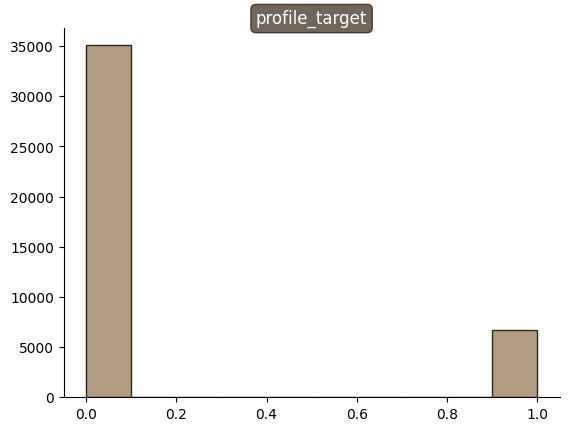

In [66]:
fig, ax = plt.subplots()

ax.hist(df_transformed['target_default'], color='#B39C84', edgecolor='#332617')
ax.spines[['right', 'top']].set_visible(False)

title_box_props = dict(boxstyle='round', facecolor='#4C4032', edgecolor='#332617', alpha=0.8)
ax.set_title('profile_target', color='white', fontsize=12, ha='center', va='center', bbox=title_box_props)

plt.show();

Como podemos ver, se trata de uma variável desbalanceada. Teremos que tratar isso. Outra questão que devermos tratar é a quantidade de variáveis de nossos dados. Para isso, seguiremos da seguinte forma:

* Utilizaremos a função ['RFE'](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) para selecionar as variáveis mais impactantes.
* Utilizaremos o transformador ['RandomUnderSampler'](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html) para balancear os dados.

In [67]:
# instanciar o modelo
xgb = XGBClassifier()

# instanciar o transformador
rus = RandomUnderSampler()

# transformar os dados
X_res, y_res = rus.fit_resample(X, y)

# instanciar o selecionador de variaveis
selector = RFE(xgb, n_features_to_select=40)

# treinar o selecionador
selector.fit(X_res, y_res)

# transformar os dados
X_train_selected = selector.transform(X_res)
X_test_selected = selector.transform(X_test)

Agora temos quase tudo pronto para avaliar nosso modelo com os dados de teste. Porém, antes disso, iremos selecionar os melhores hiperparâmetros para nosso modelo. Faremos isso através da função ['GridSearchCV'](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [68]:
# instanciar modelo
xgb = XGBClassifier(learning_rate=0.1)

# instanciar grade de hiperparametros
param_grid = {
 'n_estimators':range(0,1000,50),
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_selected, y_res)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.6593601847724786 para {'n_estimators': 50}


In [70]:
# instanciar modelo
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50)

# instanciar grade de hiperparametros
param_grid = {
 'max_depth':range(1,8,1)
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_selected, y_res)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.6680684432558495 para {'max_depth': 1}


In [71]:
# instanciar modelo
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=1)

# instanciar grade de hiperparametros
param_grid = {
 'min_child_weight':range(1,5,1)
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_selected, y_res)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.6668636402519461 para {'min_child_weight': 1}


In [74]:
# instanciar modelo
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=1, min_child_weight=1)

# instanciar grade de hiperparametros
param_grid = {
 'gamma':[i/10.0 for i in range(0,5)]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_selected, y_res)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.6668728698713706 para {'gamma': 0.0}


In [75]:
# instanciar modelo
xgb = XGBClassifier(gamma=0.0, n_estimators=50, max_depth=1, min_child_weight=1)

# instanciar grade de hiperparametros
param_grid = {
 'learning_rate':[0.001, 0.01, 0.1, 1]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_selected, y_res)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.6619181400290846 para {'learning_rate': 0.1}


Agora que temos os valores dos nossos melhores hiperparametros, vamos de fato instanciar nosso melhor modelo, treinar e avaliar ele.

In [76]:
# padronizar dados de teste
X_test = scaler.transform(X_test)

# instanciar modelo
xgb = XGBClassifier(learning_rate=0.1, gamma=0.0, n_estimators=50, max_depth=1, min_child_weight=1)

# treinar nosso modelo
xgb.fit(X_train_selected, y_res)

# testar nosso modelo
y_pred = xgb.predict(X_test_selected)

## Avaliar o desempenho do modelo

Agora, vamos ver como nosso modelo se saiu.

In [77]:
# instanciar as matricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# exibir as matricas
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Acurácia: 0.6355
Precisão: 0.2585
Recall: 0.6542
F1 Score: 0.3706


<Axes: >

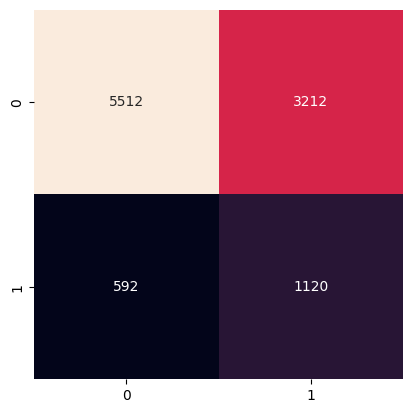

In [78]:
# criar a matriz de confusao
conf_matrix = confusion_matrix(y_test, y_pred)

# plotar o mapa de calor
sns.heatmap(conf_matrix, square=True, annot=True, cbar=False, fmt='d')

## Conclusão

Utilizando alguma técnicas conseguimos chegar a um resultado minimamente satisfatório, ainda cabendo diversas melhorias em relação ao tratamento dos dados, realizando análises mais profundas para preencher e retirar valores nulos, e em relação a engenharia de variáveis, podendo criar ou retirar algumas variáveis.

Ainda assim, podemos desde já entender a importância do aprendizado de máquina para instituições desse tipo.